In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [17]:
from arch import arch_model

In [5]:
data=pd.read_pickle("nifty_data_2019_2022.bz2") 
data.head()

,spot_open,spot_high,spot_low,spot_close,Expiry,futures_close
Date,,,,,,
2019-01-01,10881.70,10923.60,10807.10,10910.10,2019-01-31,10960.55
2019-01-02,10868.85,10895.35,10735.05,10792.50,2019-01-31,10830.85
2019-01-03,10796.80,10814.05,10661.25,10672.25,2019-01-31,10718.50
2019-01-04,10699.70,10741.05,10628.65,10727.35,2019-01-31,10777.60
2019-01-07,10804.85,10835.95,10750.15,10771.80,2019-01-31,10803.45


In [9]:
# Calculate the log returns
data['log_returns'] = np.log(data['spot_close'].pct_change() + 1)*100

In [13]:
# The choice of 14 days is just for illustration purposes. This can be changed when you tweak the code.
data['actual_historical_volatility'] = data['log_returns'].rolling(14).std() * ((252)**0.5)

In [19]:
# Function to predict the volatility of 1 day
def predict_volatility(hist_returns_data):
    # Define model
    gm = arch_model(hist_returns_data, vol='GARCH', p=1, q=1, dist='skewt')

    # Fit the model
    gm_fit = gm.fit(disp='off') 
    
    # Make forecast
    forecasted_variance = gm_fit.forecast(horizon=1).variance.values[-1]

    # Forecasted volatility
    forecasted_volatility = forecasted_variance**0.5

    # Calculate and return the annualised forecasted variance
    annualised_volatility = forecasted_volatility * (252**0.5)
    return annualised_volatility

# Calculate the GARCH predicted volatility for the each day    
data['GARCH_predicted_volatility'] = data['log_returns'].rolling(252).apply(predict_volatility, raw=True)

# Shift the GARCH predicted volatility to match with the actual historical volatility on each day    
data['GARCH_predicted_volatility'] = data['GARCH_predicted_volatility'].shift(1)

In [25]:
# Function to predict the volatility of 1 day
def predict_volatility(hist_returns_data):
    # Define model
    gm = arch_model(hist_returns_data, vol='ARCH', p=1, dist='skewt')

    # Fit the model
    gm_fit = gm.fit(disp='off') 
    
    # Make forecast
    forecasted_variance = gm_fit.forecast(horizon=1).variance.values[-1]

    # Forecasted volatility
    forecasted_volatility = forecasted_variance**0.5

    # Calculate and return the annualised forecasted variance
    annualised_volatility = forecasted_volatility * (252**0.5)
    return annualised_volatility

# Calculate the ARCH predicted volatility for the each day    
data['ARCH_predicted_volatility'] = data['log_returns'].rolling(252).apply(predict_volatility, raw=True)

# Shift the ARCH predicted volatility to match with the actual historical volatility on each day    
data['ARCH_predicted_volatility'] = data['ARCH_predicted_volatility'].shift(1)

In [23]:
# Showing an example where the ARCH failed to capture volatility clustering but GARCH captures it well
data[['log_returns','GARCH_predicted_volatility', 'actual_historical_volatility']].dropna()[65:70].round(2)

,log_returns,GARCH_predicted_volatility,actual_historical_volatility
Date,,,
2020-04-20,-0.05,50.90,55.81
2020-04-21,-3.07,43.75,56.17
2020-04-22,2.27,45.22,56.80
2020-04-23,1.37,43.76,52.26
2020-04-24,-1.73,39.99,51.50


In [27]:
# Showing an example where the ARCH failed to capture volatility clustering but GARCH captures it well
data[['log_returns','ARCH_predicted_volatility','GARCH_predicted_volatility', 'actual_historical_volatility']].dropna()[65:70].round(2)

,log_returns,ARCH_predicted_volatility,GARCH_predicted_volatility,actual_historical_volatility
Date,,,,
2020-04-20,-0.05,52.44,50.90,55.81
2020-04-21,-3.07,24.37,43.75,56.17
2020-04-22,2.27,54.34,45.22,56.80
2020-04-23,1.37,44.82,43.76,52.26
2020-04-24,-1.73,33.84,39.99,51.50


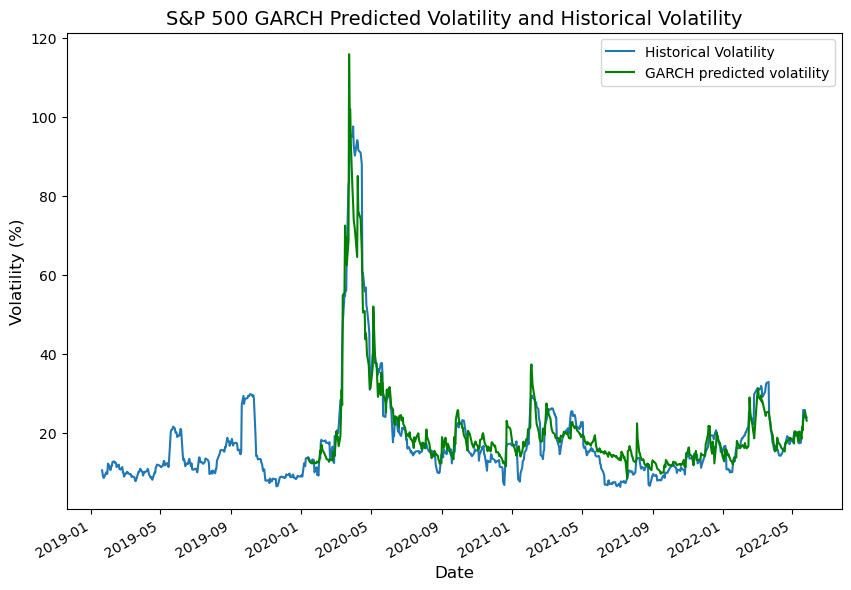

In [29]:
data['actual_historical_volatility'].plot(figsize=(10, 7))
data['GARCH_predicted_volatility'].plot(figsize=(10, 7), color='green')
# Set title and labels for the plot
plt.title('S&P 500 GARCH Predicted Volatility and Historical Volatility', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volatility (%)', fontsize=12)
plt.legend(['Historical Volatility', 'GARCH predicted volatility'])
plt.show()

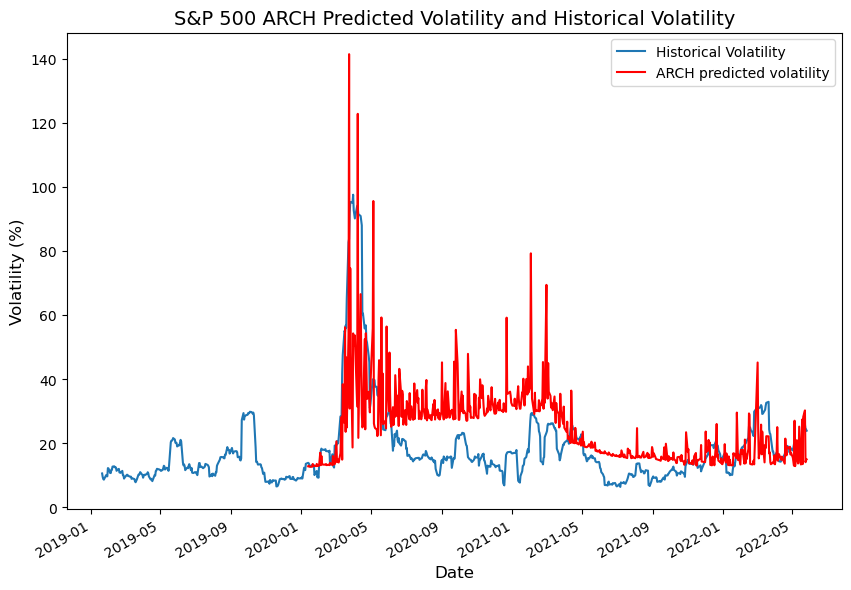

In [31]:
data['actual_historical_volatility'].plot(figsize=(10, 7))
data['ARCH_predicted_volatility'].plot(figsize=(10, 7), color='red')
# Set title and labels for the plot
plt.title('S&P 500 ARCH Predicted Volatility and Historical Volatility', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volatility (%)', fontsize=12)
plt.legend(['Historical Volatility', 'ARCH predicted volatility'])
plt.show()